### Task 1: Data preparation and customer analytics

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current `purchasing trends` and `behaviours`. The client is particularly interested in `customer segments` and their `chip purchasing behaviour`. Consider what metrics would help describe the customers’ purchasing behaviour.  

Begin performing high-level data checks such as:

- Creating and interpreting high-level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

You will also want to derive extra features such as `pack size` and `brand name` from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

`LIFESTAGE`: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

`PREMIUM_CUSTOMER`: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')
trans = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
chip = pd.merge(trans,purchase_behaviour, on = 'LYLTY_CARD_NBR', how = 'inner')

In [6]:
# Drop duplicates

chip.duplicated().sum()

1

In [7]:
chip = chip.drop_duplicates()

In [8]:
chip.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [9]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [10]:
chip['DATE'] = pd.to_datetime(chip['DATE'], origin = '1899-12-30', unit = 'D')

In [11]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


# DEA

In [12]:
def packsize(s):
    a = []
    for i in s:
        if i.isdigit():
            a.append(i)
    packsize = int(''.join(a))
    return packsize

In [13]:
chip['PACK_SIZE'] = chip['PROD_NAME'].apply(packsize)

In [14]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170


In [15]:
def extract_brand(chip, PROD_NAME):
    return chip['PROD_NAME'].str.split().str[0]

In [16]:
chip['BRAND_NAME'] = extract_brand(chip, 'PROD_NAME')

In [17]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


In [18]:
chip['BRAND_NAME'].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3185
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28859
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: BRAND_NAME, dtype: int64

In [19]:
def replace_brand_name(chip):
    replacements = {
        'WW':'Woolworths',
        'Snbts':'Sunbites',
        'Smith':'Smiths',
        'Red':'RRD',
        'Natural':'NCC',
        'Infzns':'Infuzions',
        'GrnWves':'Grain',
        'Dorito':'Doritos'
    }
    for old_name, new_name in replacements.items():
        chip['BRAND_NAME'].replace(old_name, new_name, inplace = True)
    return chip

In [20]:
chip = replace_brand_name(chip)

In [21]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


In [22]:
chip['BRAND_NAME'].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Doritos       28147
French         1418
Grain          7740
Infuzions     14201
Kettle        41288
NCC            7469
Old            9324
Pringles      25102
RRD           17779
Smiths        31822
Sunbites       3008
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
Woolworths    14757
Name: BRAND_NAME, dtype: int64

In [23]:
chip['PROD_QTY'].value_counts()

2      236038
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [24]:
chip = chip[chip['PROD_QTY'] <= 5]

In [25]:
chip.sort_values(['DATE']).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
111658,2018-07-01,160,160202,161403,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,OLDER SINGLES/COUPLES,Mainstream,150,Doritos
198399,2018-07-01,168,168215,170691,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Budget,150,Kettle
151701,2018-07-01,109,109019,110294,34,Pringles Slt Vingar 134g,2,7.4,RETIREES,Mainstream,134,Pringles
107927,2018-07-01,89,89003,88123,6,RRD Lime & Pepper 165g,1,3.0,OLDER SINGLES/COUPLES,Mainstream,165,RRD
198724,2018-07-01,176,176054,177009,7,Smiths Crinkle Original 330g,1,5.7,YOUNG FAMILIES,Budget,330,Smiths


In [26]:
chip['DATE'].unique().shape

(364,)

In [27]:
date_range = pd.date_range(chip['DATE'].min(), chip['DATE'].max())

In [28]:
date_range.difference(chip['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

### Customer Segment, Purchase behaviour

In [29]:
chip.sort_values(['DATE']).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
111658,2018-07-01,160,160202,161403,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,OLDER SINGLES/COUPLES,Mainstream,150,Doritos
198399,2018-07-01,168,168215,170691,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Budget,150,Kettle
151701,2018-07-01,109,109019,110294,34,Pringles Slt Vingar 134g,2,7.4,RETIREES,Mainstream,134,Pringles
107927,2018-07-01,89,89003,88123,6,RRD Lime & Pepper 165g,1,3.0,OLDER SINGLES/COUPLES,Mainstream,165,RRD
198724,2018-07-01,176,176054,177009,7,Smiths Crinkle Original 330g,1,5.7,YOUNG FAMILIES,Budget,330,Smiths


### LIFESTAGE - PREMIUM_CUSTOMER - TOT_SALE

In [30]:
chip.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['TOT_SALES']].agg(['sum','mean'])

TOT_SALES          
                                               sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
                       Mainstream         90803.85  7.647284
                       Premium            58432.65  7.112056
NEW FAMILIES           Budget             21928.45  7.297321
                       Mainstream         17013.90  7.317806
                       Premium            11491.10  7.231655
OLDER FAMILIES         Budget            168363.25  7.269570
                       Mainstream        103445.55  7.262395
                       Premium            80658.40  7.208079
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
                       Mainstream        133393.80  7.282116
                       Premium           132257.15  7.449848
RETIREES               Budget            113147.80  7.443445
                       Mainstream        155677.05  7.252262
                       Premium            97646.05  7.456174
YOUNG FAMILIES         Budget            139345.85  7.287201
                       Mainstream         92788.75  7.189025
                       Premium            84025.50  7.266756
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
                       Mainstream        157621.60  7.558339
                       Premium            41642.10  6.629852

In [31]:
customer_seg_by_sale = chip.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index = False)[['TOT_SALES']].sum()

In [32]:
total_sale_by_lifestage = customer_seg_by_sale.groupby(['LIFESTAGE'])['TOT_SALES'].transform('sum')

In [33]:
customer_seg_by_sale['LIFESTAGE_SALE_PERCENTAGE'] = (customer_seg_by_sale['TOT_SALES']/total_sale_by_lifestage * 100).round(2)

In [34]:
total_sale_by_premium_cus = customer_seg_by_sale.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].transform('sum')

In [35]:
customer_seg_by_sale['PREMIUM_CUS_SALE_PERCENTAGE'] = (customer_seg_by_sale['TOT_SALES']/total_sale_by_premium_cus*100).round(2)

In [36]:
customer_seg_by_sale

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,LIFESTAGE_SALE_PERCENTAGE,PREMIUM_CUS_SALE_PERCENTAGE
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,19.22,5.25
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,49.15,12.10
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,31.63,11.54
3,NEW FAMILIES,Budget,21928.45,43.48,3.24
4,NEW FAMILIES,Mainstream,17013.90,33.74,2.27
5,NEW FAMILIES,Premium,11491.10,22.78,2.27
6,OLDER FAMILIES,Budget,168363.25,47.77,24.90
7,OLDER FAMILIES,Mainstream,103445.55,29.35,13.78
8,OLDER FAMILIES,Premium,80658.40,22.88,15.94
9,OLDER SINGLES/COUPLES,Budget,136769.80,33.99,20.23


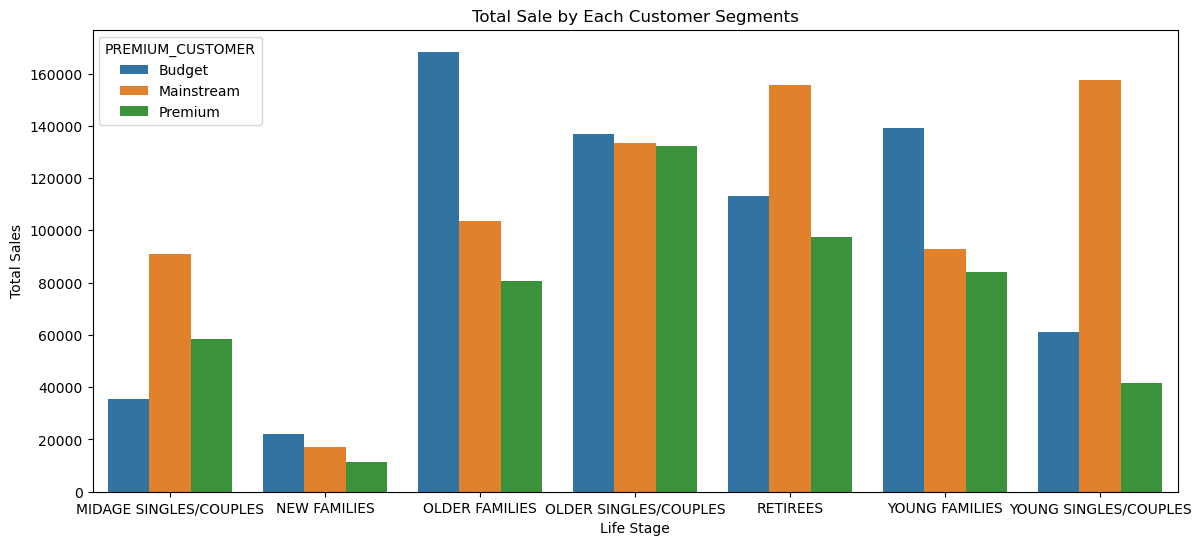

In [37]:
plt.figure(figsize = (14,6))
sns.barplot(data = customer_seg_by_sale, x = 'LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER')
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.title('Total Sale by Each Customer Segments')
plt.show()

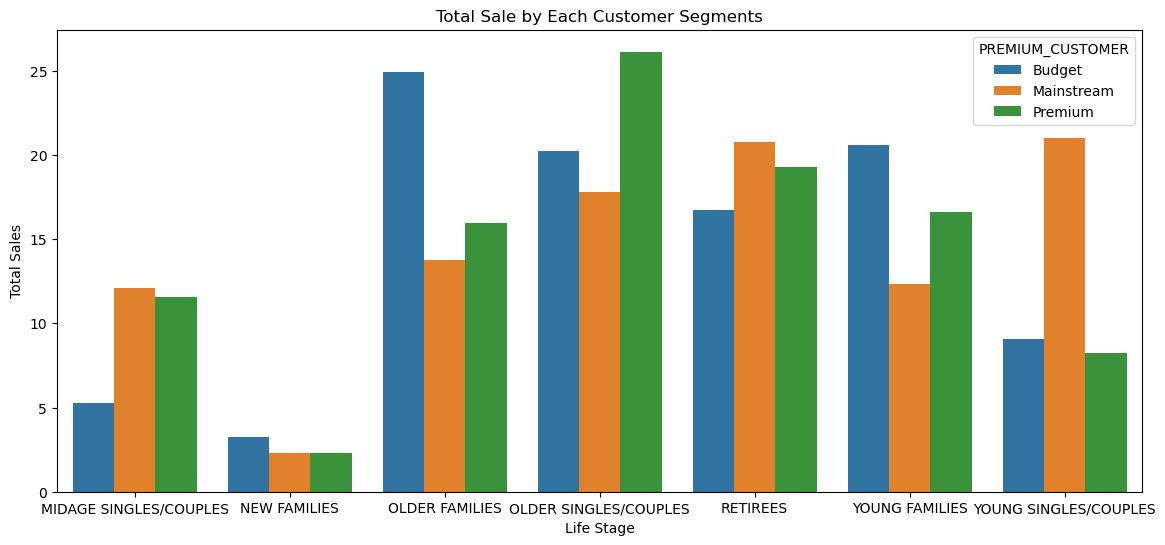

In [38]:
plt.figure(figsize = (14,6))
sns.barplot(data = customer_seg_by_sale, x = 'LIFESTAGE', y = 'PREMIUM_CUS_SALE_PERCENTAGE', hue = 'PREMIUM_CUSTOMER')
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.title('Total Sale by Each Customer Segments')
plt.show()

In [39]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


### LIFESTAGE - PREMIUM_CUSTOMER - PACKSIZE

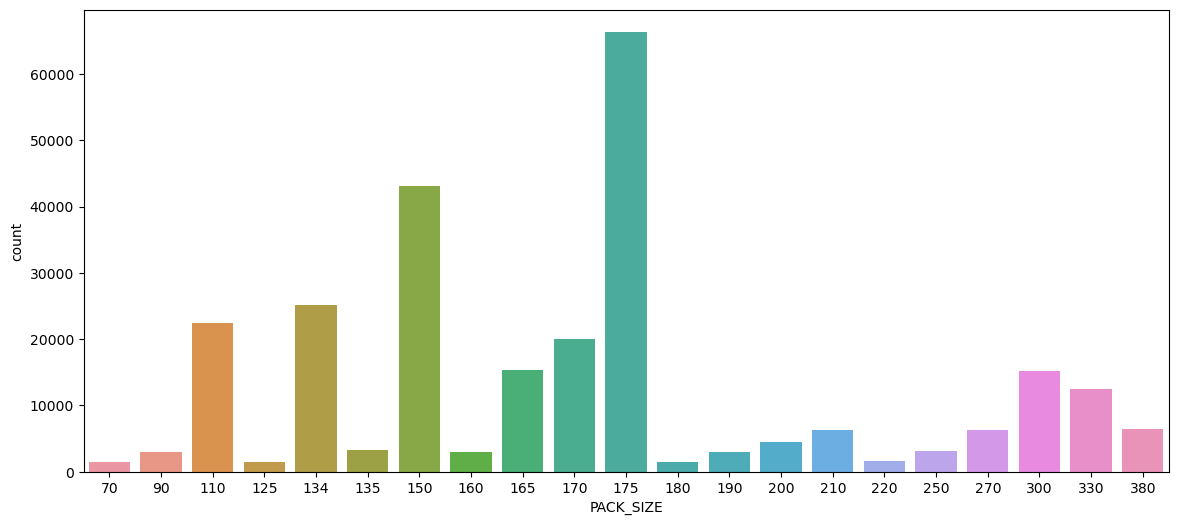

In [40]:
plt.figure(figsize = (14,6))
sns.countplot(data = chip, x = 'PACK_SIZE')
plt.show()

In [114]:
def popular_packsize(chip):
    for stage, premium in chip[['LIFESTAGE','PREMIUM_CUSTOMER']].drop_duplicates().itertuples(index=False):
        
        summary = (
            chip[(chip['LIFESTAGE'] == stage) & (chip['PREMIUM_CUSTOMER'] == premium)]
            .groupby('PACK_SIZE')['PACK_SIZE'].count()
            .reset_index(name = 'PACK_COUNTS')
            .sort_values(by = 'PACK_COUNTS', ascending = False)
            .head(3)
        )
    
        fig, ax = plt.subplots(figsize = (5,2))
        summary.plot.barh(x= 'PACK_SIZE', y = 'PACK_COUNTS', ax = ax)
        ax.set_ylabel('Pack Size')
        ax.set_ylabel('Pack Count')
        ax.set_title(f"{stage} - {premium}")
        plt.tight_layout()
        plt.legend().remove()
        plt.show()

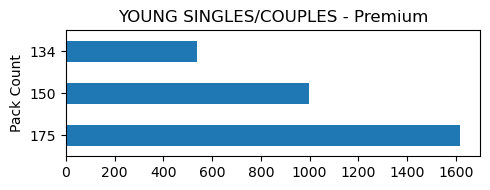

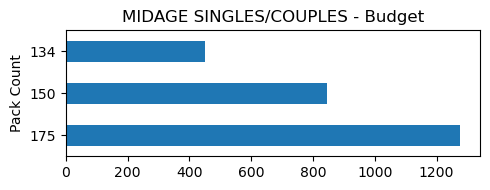

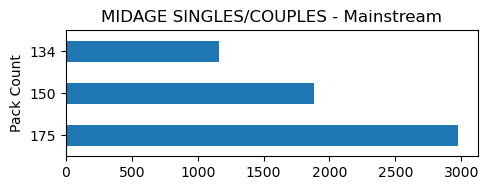

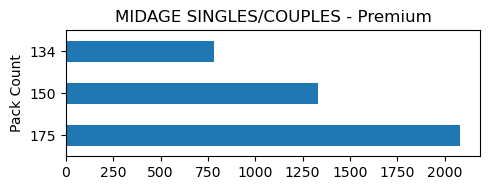

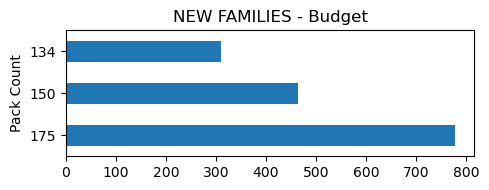

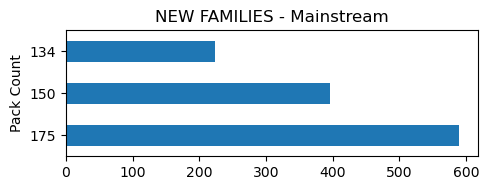

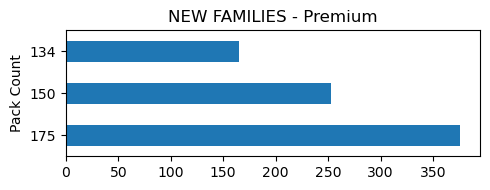

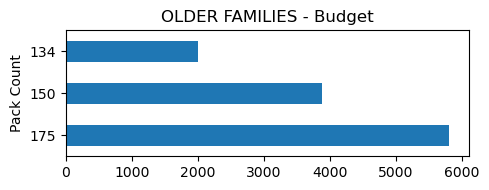

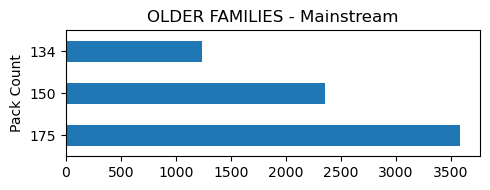

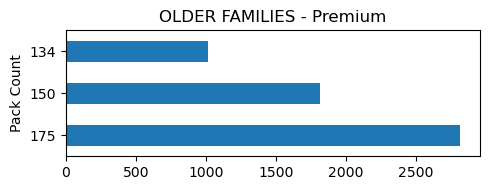

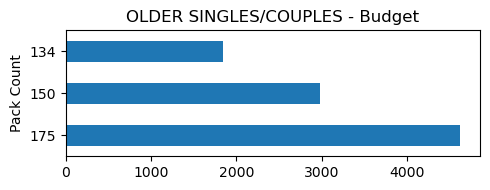

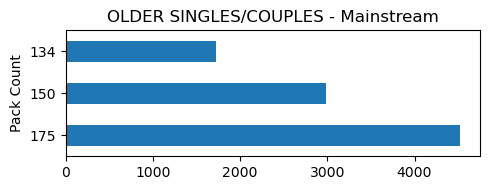

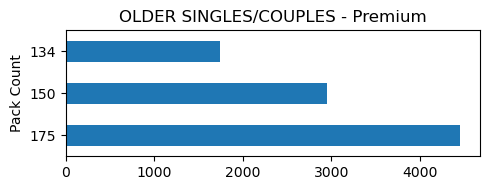

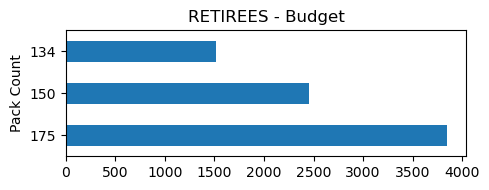

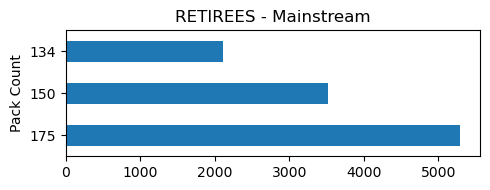

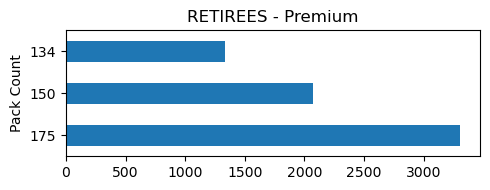

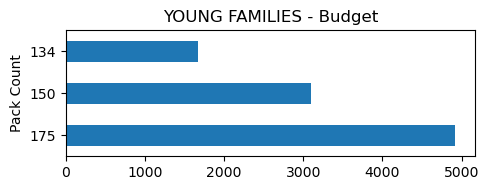

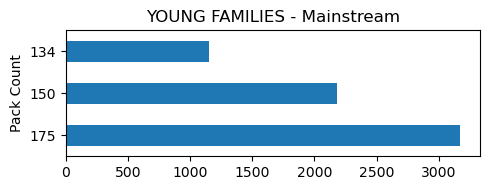

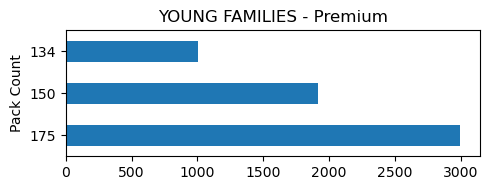

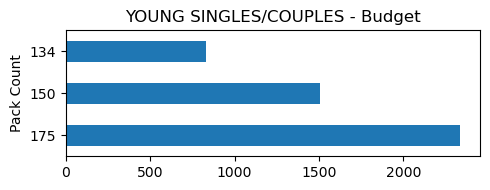

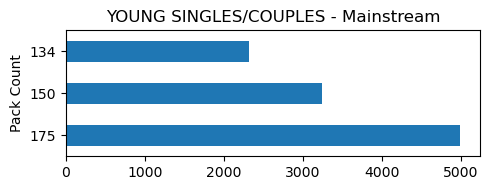

In [115]:
popular_packsize(chip)

### LIFESTAGE - PREMIUM_CUSTOMER - BRAND_NAME

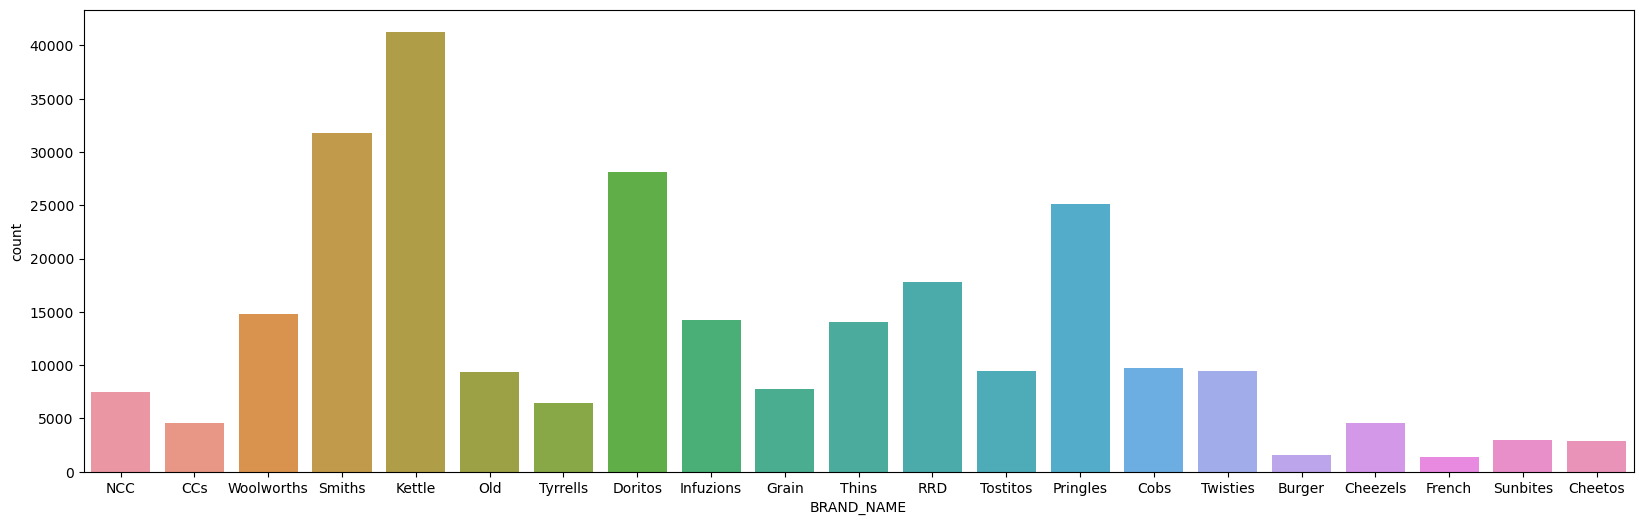

In [43]:
plt.figure(figsize = (20,6))
sns.countplot(data = chip, x = 'BRAND_NAME')
plt.show()

In [112]:
def popular_brand(chip):
    for stage, premium in chip[['LIFESTAGE','PREMIUM_CUSTOMER']].drop_duplicates().itertuples(index = False):
        
        brand = (
            chip[(chip['LIFESTAGE'] == stage) & (chip['PREMIUM_CUSTOMER'] == premium)]
            .groupby('BRAND_NAME')['BRAND_NAME'].count()
            .reset_index(name = 'BRAND_COUNT')
            .sort_values(by = 'BRAND_COUNT', ascending = False)
            .head(3)
        )
        
        fig, ax = plt.subplots(figsize = (5,2))
        brand.plot.barh(x = 'BRAND_NAME', y = 'BRAND_COUNT', ax = ax)
        ax.set_title(f'{stage} - {premium}')
        ax.set_xlabel('Brand Count')
        ax.set_ylabel('Brand Name')
        plt.legend().remove()
        plt.tight_layout()
        plt.show()

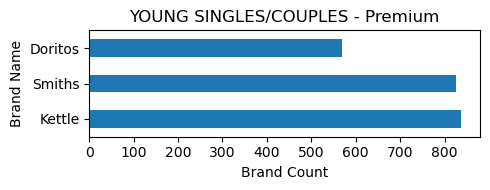

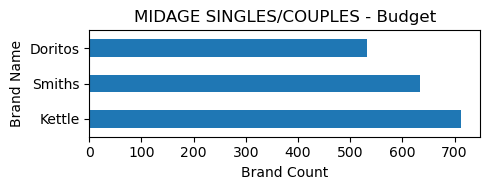

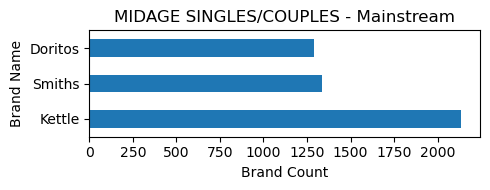

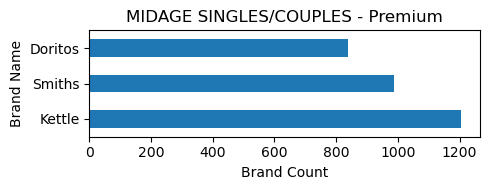

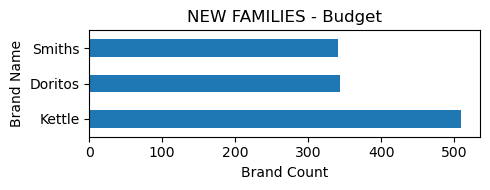

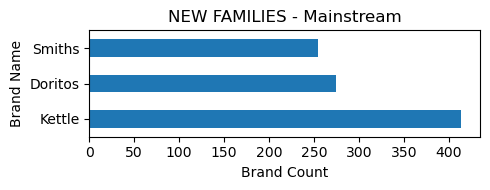

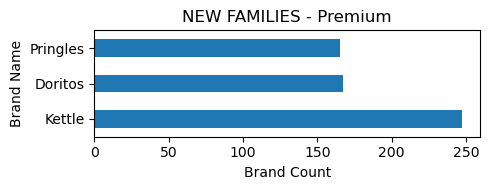

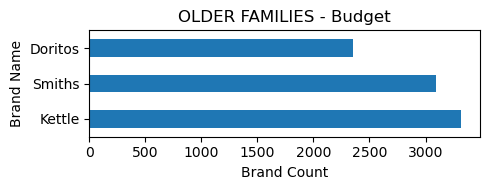

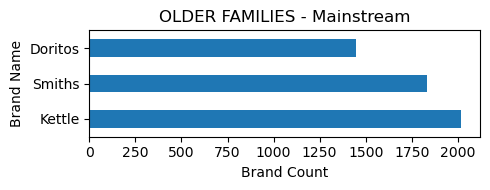

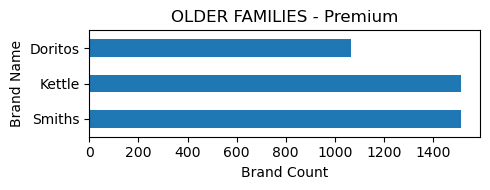

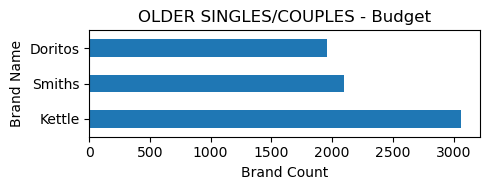

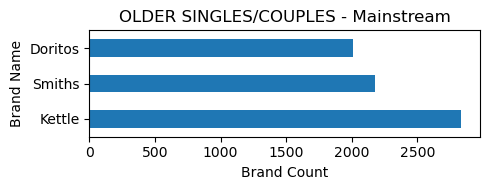

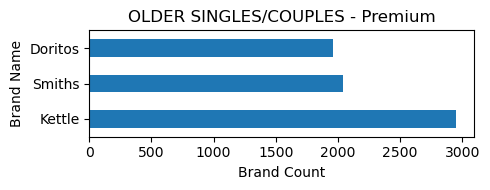

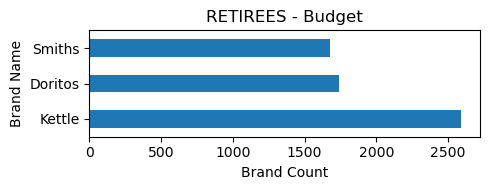

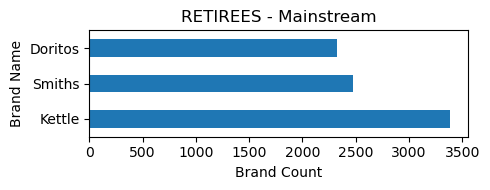

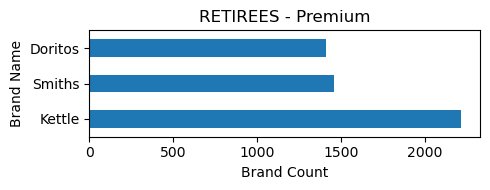

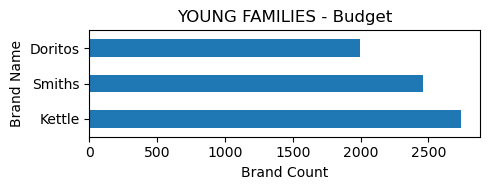

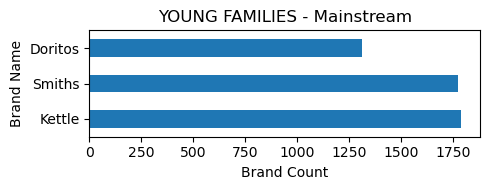

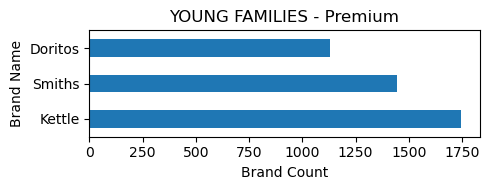

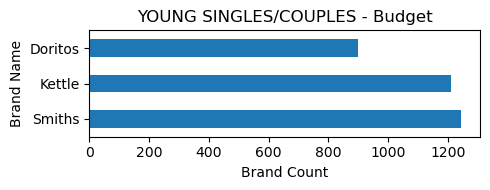

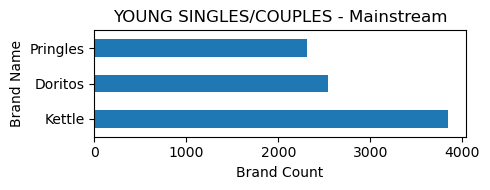

In [113]:
popular_brand(chip)

In [46]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


In [47]:
chip['WEEK_DAY'] = chip['DATE'].dt.day_name()
chip['MONTH'] = chip['DATE'].dt.month_name()

In [48]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,WEEK_DAY,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NCC,Wednesday,October
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs,Tuesday,May
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths,Saturday,November
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs,Saturday,March
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths,Monday,May


In [103]:
def popular_week_day(chip):
    for stage, premium in chip[['LIFESTAGE','PREMIUM_CUSTOMER']].drop_duplicates().itertuples(index = False):
        
        brand = (
            chip[(chip['LIFESTAGE'] == stage) & (chip['PREMIUM_CUSTOMER'] == premium)]
            .groupby('WEEK_DAY')['WEEK_DAY'].count()
            .reset_index(name = 'WEEK_DAY_COUNT')
            .sort_values(by='WEEK_DAY', key=lambda x: x.map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}))
            .head(7)
        )
        
        fig, ax = plt.subplots(figsize = (7,2))
        brand.plot.line(x = 'WEEK_DAY', y = 'WEEK_DAY_COUNT', ax = ax)
        ax.set_title(f'{stage} - {premium}')
        ax.set_xlabel('WEEK_DAY_COUNT')
        ax.set_ylabel('WEEK_DAY')
        plt.legend().remove()
        plt.tight_layout()
        plt.show()

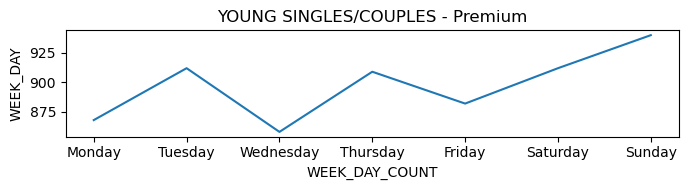

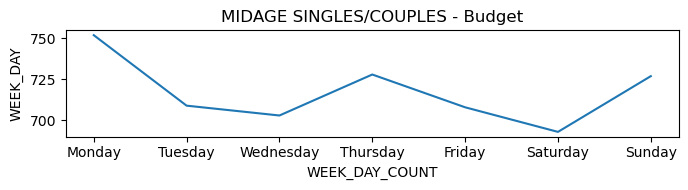

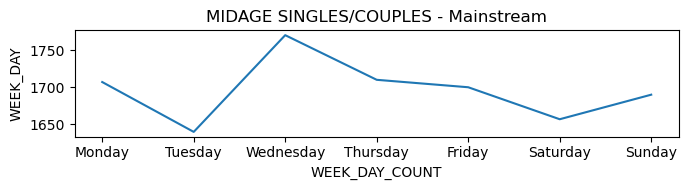

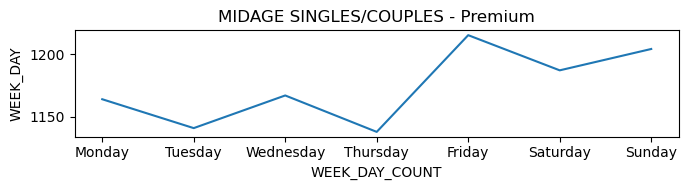

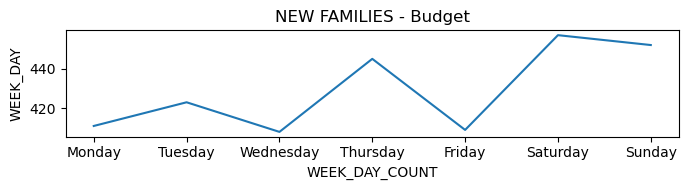

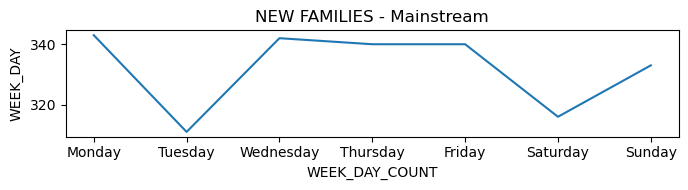

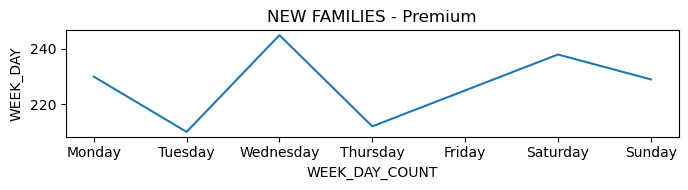

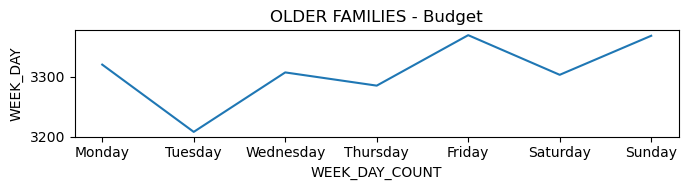

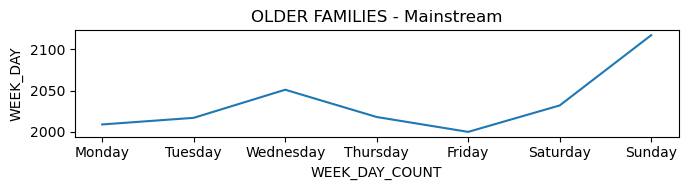

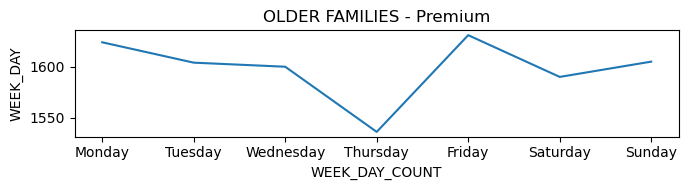

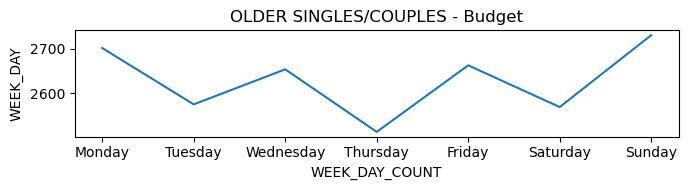

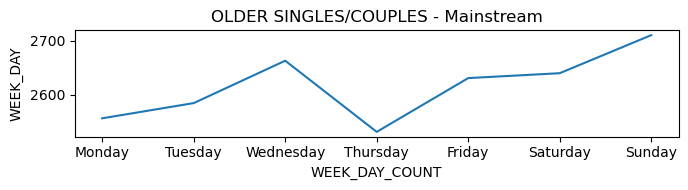

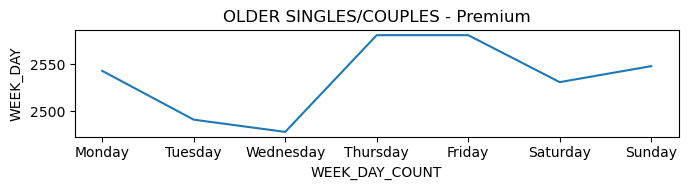

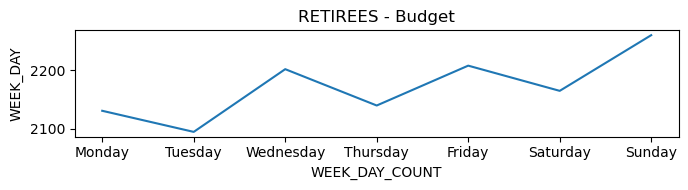

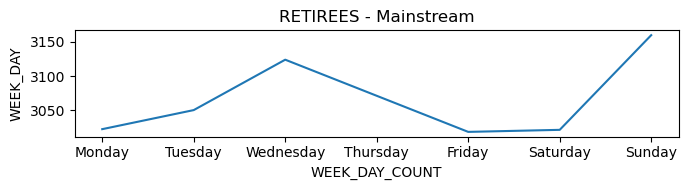

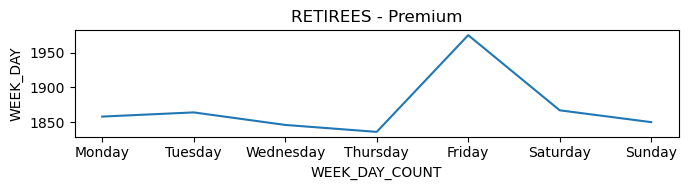

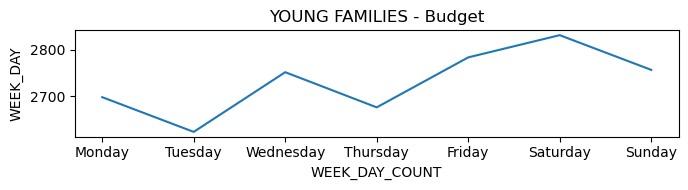

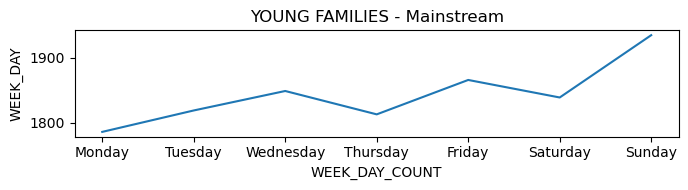

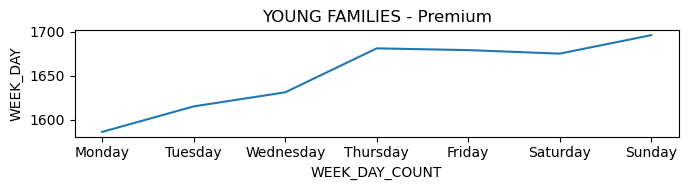

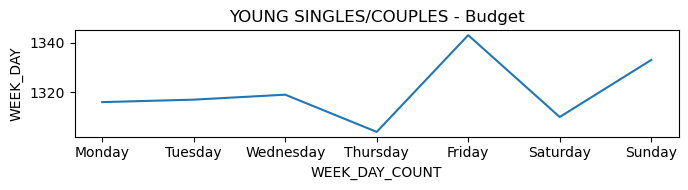

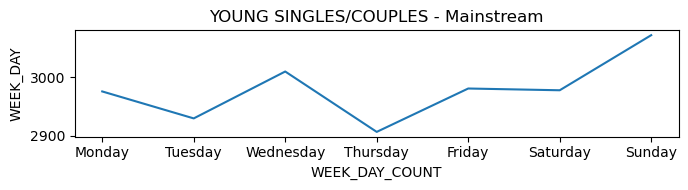

In [104]:
popular_week_day(chip)

In [110]:
def popular_month(chip):
    for stage, premium in chip[['LIFESTAGE','PREMIUM_CUSTOMER']].drop_duplicates().itertuples(index = False):
        
        brand = (
            chip[(chip['LIFESTAGE'] == stage) & (chip['PREMIUM_CUSTOMER'] == premium)]
            .groupby('MONTH')['MONTH'].count()
            .reset_index(name = 'MONTH_COUNT')
            .sort_values(by='MONTH', key=lambda x: x.map({'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August':7 , 'September':8 , 'October':9 , 'November':10, 'December':11}))

        )
        
        fig, ax = plt.subplots(figsize = (10,2))
        brand.plot.line(x = 'MONTH', y = 'MONTH_COUNT', ax = ax)
        ax.set_title(f'{stage} - {premium}')
        ax.set_xlabel('MONTH_COUNT')
        ax.set_ylabel('MONTH')
        plt.legend().remove()
        plt.tight_layout()
        plt.show()

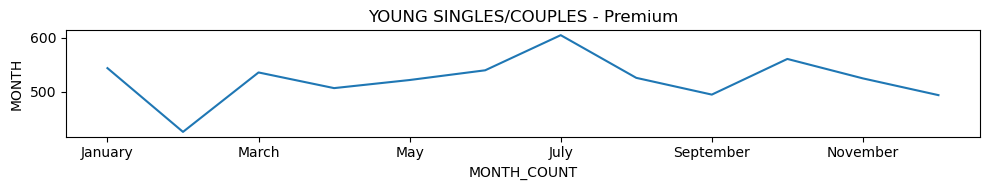

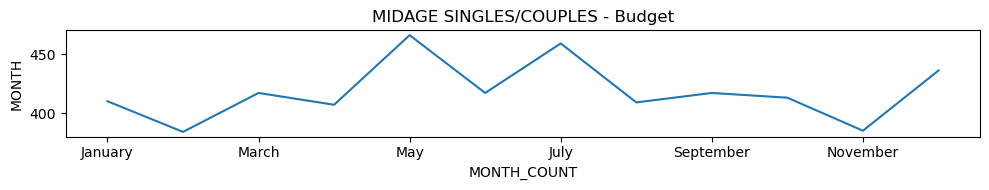

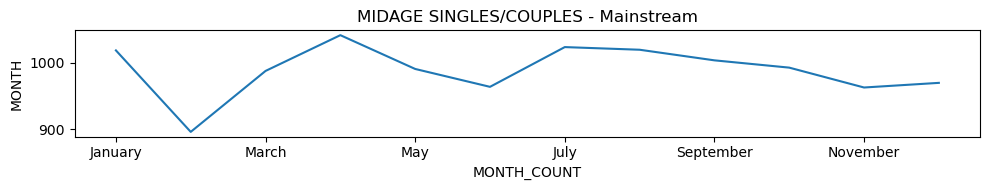

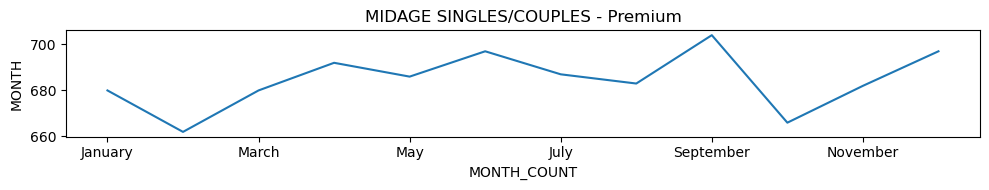

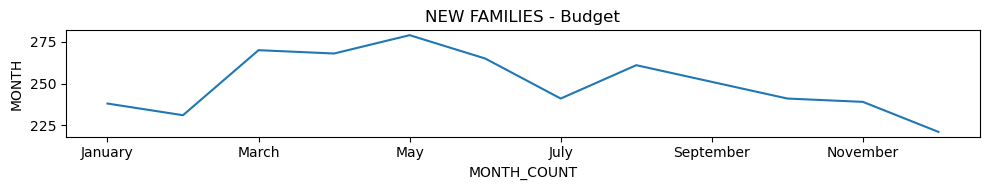

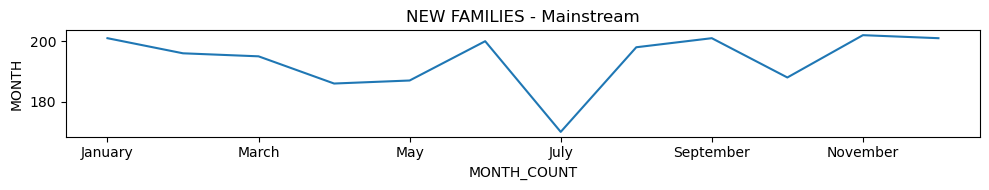

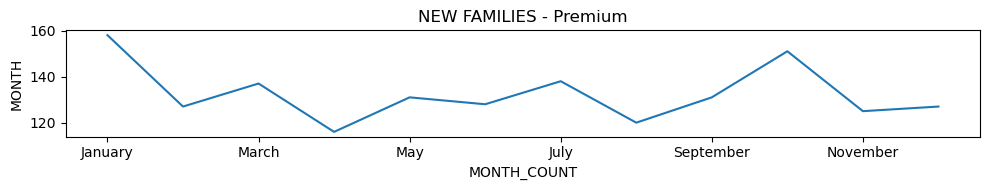

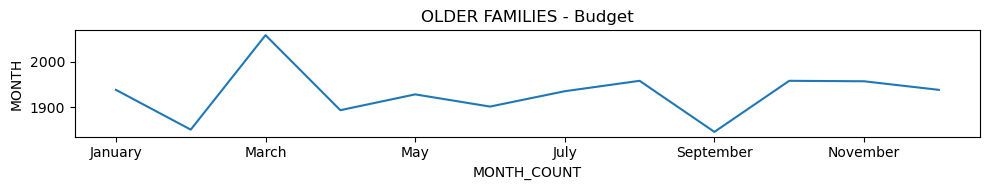

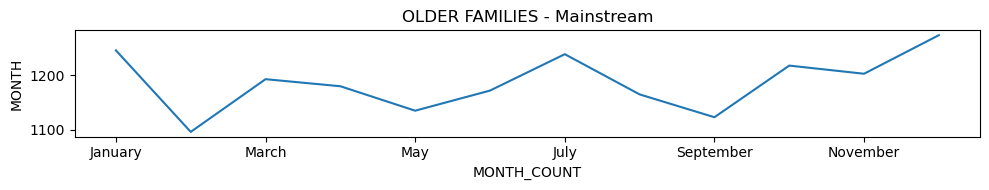

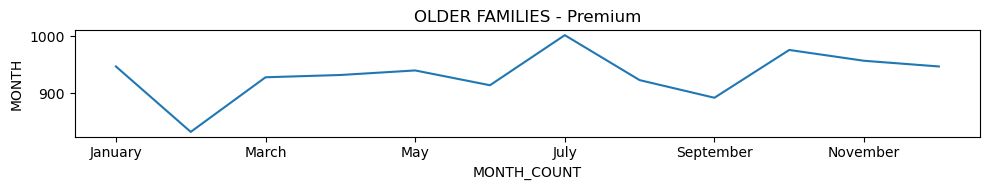

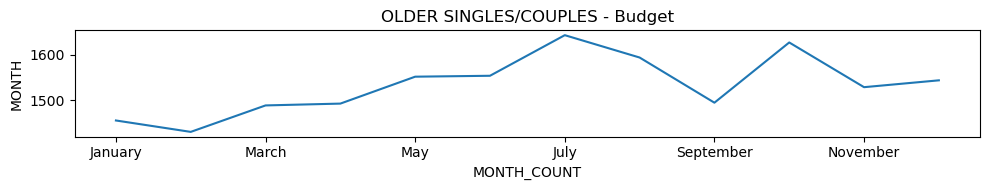

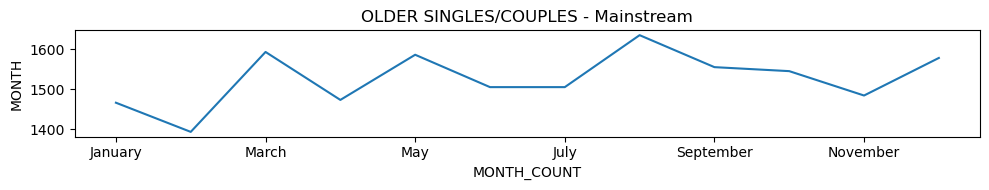

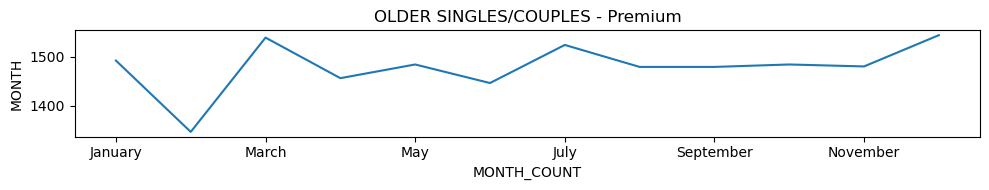

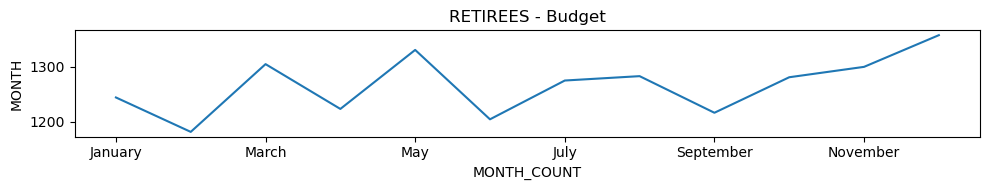

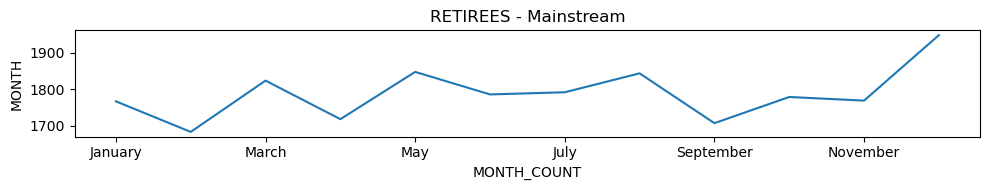

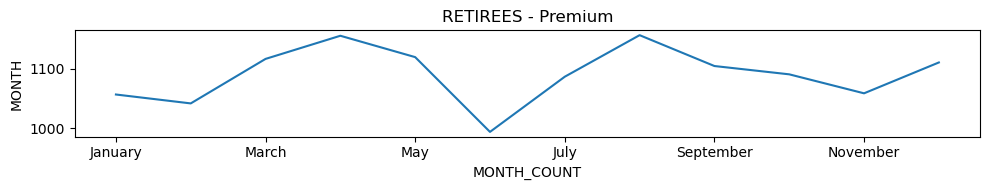

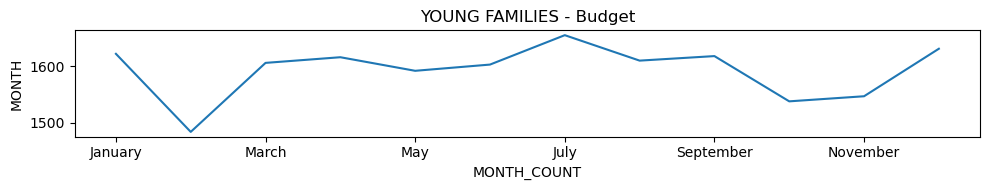

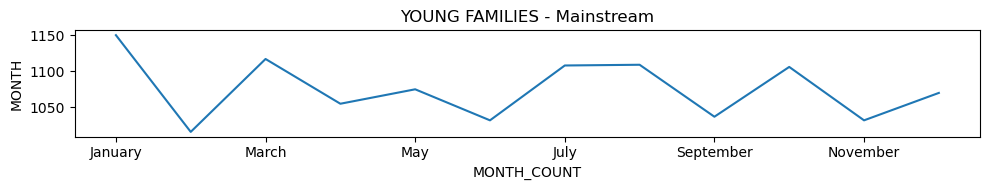

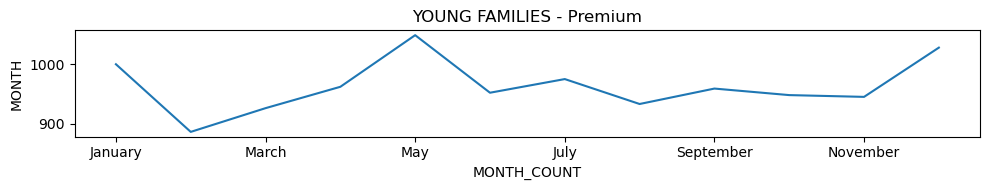

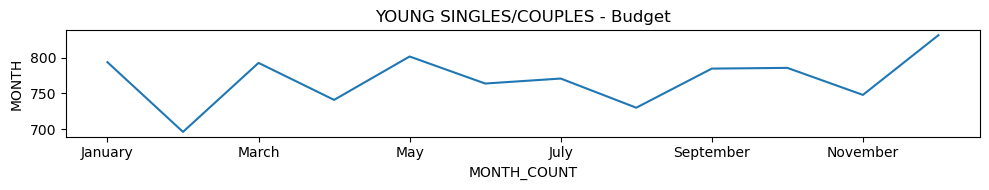

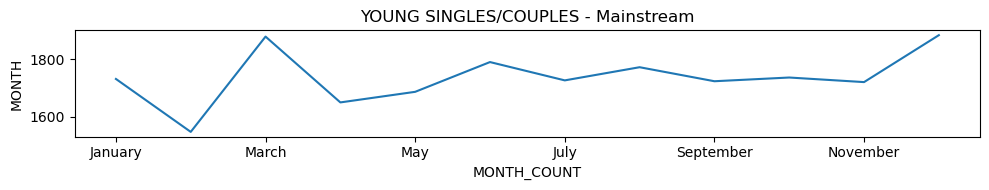

In [111]:
popular_month(chip)

In [56]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,WEEK_DAY,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NCC,Wednesday,October
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs,Tuesday,May
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths,Saturday,November
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs,Saturday,March
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths,Monday,May


In [57]:
cus_count = chip.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'], as_index = False)[['LYLTY_CARD_NBR']].nunique()

In [58]:
cus_count

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1504
1,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Premium,2431
3,NEW FAMILIES,Budget,1112
4,NEW FAMILIES,Mainstream,849
5,NEW FAMILIES,Premium,588
6,OLDER FAMILIES,Budget,4675
7,OLDER FAMILIES,Mainstream,2831
8,OLDER FAMILIES,Premium,2273
9,OLDER SINGLES/COUPLES,Budget,4929


In [59]:
total_cus = cus_count['LYLTY_CARD_NBR'].sum()

In [60]:
cus_count['CUS_PERCENTAGE'] = (cus_count['LYLTY_CARD_NBR']/total_cus * 100).round(2)

In [61]:
cus_count

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,CUS_PERCENTAGE
0,MIDAGE SINGLES/COUPLES,Budget,1504,2.07
1,MIDAGE SINGLES/COUPLES,Mainstream,3340,4.60
2,MIDAGE SINGLES/COUPLES,Premium,2431,3.35
3,NEW FAMILIES,Budget,1112,1.53
4,NEW FAMILIES,Mainstream,849,1.17
5,NEW FAMILIES,Premium,588,0.81
6,OLDER FAMILIES,Budget,4675,6.44
7,OLDER FAMILIES,Mainstream,2831,3.90
8,OLDER FAMILIES,Premium,2273,3.13
9,OLDER SINGLES/COUPLES,Budget,4929,6.79


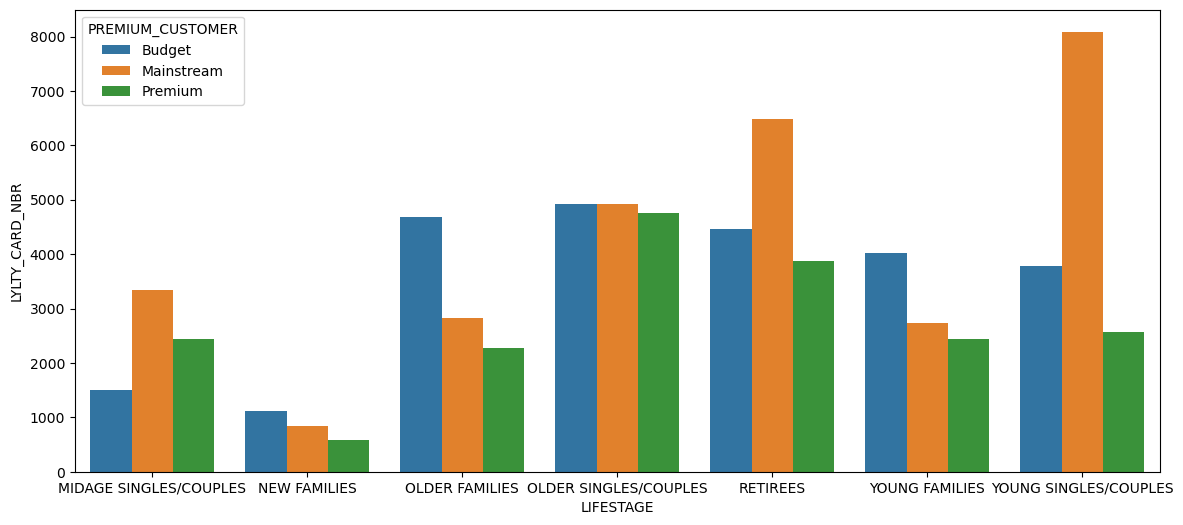

In [62]:
plt.figure(figsize = (14,6))
sns.barplot(data = cus_count, x = 'LIFESTAGE', y = 'LYLTY_CARD_NBR', hue ='PREMIUM_CUSTOMER')
plt.show()

In [63]:
chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,WEEK_DAY,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NCC,Wednesday,October
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs,Tuesday,May
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths,Saturday,November
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs,Saturday,March
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths,Monday,May


In [64]:
chip.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].mean()

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget            1.891633
                       Mainstream        1.911656
                       Premium           1.889727
NEW FAMILIES           Budget            1.853910
                       Mainstream        1.857634
                       Premium           1.860919
OLDER FAMILIES         Budget            1.945812
                       Mainstream        1.948610
                       Premium           1.945576
OLDER SINGLES/COUPLES  Budget            1.913403
                       Mainstream        1.910525
                       Premium           1.914268
RETIREES               Budget            1.892244
                       Mainstream        1.887543
                       Premium           1.900122
YOUNG FAMILIES         Budget            1.940749
                       Mainstream        1.940342
                       Premium           1.937732
YOUNG SINGLES/COUPLES  Budget            1.803830
                       Mainstream        1.852498
                       Premium           1.804012